<a href="https://colab.research.google.com/github/sheilsarda/ESE546_Final_Project/blob/master/CAML_Impl.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#@title Mount Google Drive
#@markdown Your work will be stored in a folder called `cs330_fall2020` by default to prevent Colab instance timeouts 
#@markdown from deleting your edits and requiring you to redownload the mujoco library. Feel free to use this if you want to write out plots.

import os
from google.colab import drive
drive.mount('/content/gdrive')

#@title set up mount symlink

DRIVE_PATH = '/content/gdrive/My\ Drive/cs330_fall2020'
DRIVE_PYTHON_PATH = DRIVE_PATH.replace('\\', '')
if not os.path.exists(DRIVE_PYTHON_PATH):
  %mkdir $DRIVE_PATH

## the space in `My Drive` causes some issues,
## make a symlink to avoid this
SYM_PATH = '/content/cs330_fall2020'
if not os.path.exists(SYM_PATH):
  !ln -s $DRIVE_PATH $SYM_PATH

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
#@title Install Requirements
#@markdown Requirements for the assignment and display drivers

# Robot sim
!pip install gym==0.15.4
!pip install pygame

# Various things for render
!apt-get install python-opengl -y
!apt install xvfb -y

# Rendering Environment
!pip install pyvirtualdisplay
!pip install piglet
!sudo apt-get install -y xvfb ffmpeg
!pip install imageio
!pip install PILLOW

# Commented out IPython magic to ensure Python compatibility.
#@title Download Mujoco from an online repository

#@title Download Mujoco from an online repository

MJC_PATH = '{}/mujoco'.format(SYM_PATH)
if not os.path.exists(MJC_PATH):
  %mkdir $MJC_PATH
%cd $MJC_PATH
if not os.path.exists(os.path.join(MJC_PATH, 'mujoco200')):
  !wget -q https://www.roboti.us/download/mujoco200_linux.zip
  !unzip -q mujoco200_linux.zip
  %mv mujoco200_linux mujoco200
  %rm mujoco200_linux.zip

os.environ['LD_LIBRARY_PATH'] += ':{}/mujoco200/bin'.format(MJC_PATH)
os.environ['MUJOCO_PY_MUJOCO_PATH'] = '{}/mujoco200'.format(MJC_PATH)
os.environ['MUJOCO_PY_MJKEY_PATH'] = '{}/mjkey.txt'.format(MJC_PATH)

## installation on colab does not find *.so files
## in LD_LIBRARY_PATH, copy over manually instead
!cp $MJC_PATH/mujoco200/bin/*.so /usr/lib/x86_64-linux-gnu/

#@title Important system updates for mujoco-py
!apt update 
!apt install -y --no-install-recommends \
        build-essential \
        curl \
        git \
        gnupg2 \
        make \
        cmake \
        ffmpeg \
        swig \
        libz-dev \
        unzip \
        zlib1g-dev \
        libglfw3 \
        libglfw3-dev \
        libxrandr2 \
        libxinerama-dev \
        libxi6 \
        libxcursor-dev \
        libgl1-mesa-dev \
        libgl1-mesa-glx \
        libglew-dev \
        libosmesa6-dev \
        lsb-release \
        ack-grep \
        patchelf \
        wget \
        xpra \
        xserver-xorg-dev \
        xvfb \
        python-opengl \
        ffmpeg > /dev/null 2>&1

#@title Clone and install mujoco-py
#@markdown Remember that you need to put the key in the appropriate location as described above
%cd $MJC_PATH
if not os.path.exists('mujoco-py'):
  !git clone https://github.com/openai/mujoco-py.git
%cd mujoco-py
%pip install -e .

## cythonize at the first import
import mujoco_py

Reading package lists... Done
Building dependency tree       
Reading state information... Done
python-opengl is already the newest version (3.1.0+dfsg-1).
0 upgraded, 0 newly installed, 0 to remove and 33 not upgraded.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
xvfb is already the newest version (2:1.19.6-1ubuntu4.8).
0 upgraded, 0 newly installed, 0 to remove and 33 not upgraded.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
ffmpeg is already the newest version (7:3.4.8-0ubuntu0.2).
xvfb is already the newest version (2:1.19.6-1ubuntu4.8).
0 upgraded, 0 newly installed, 0 to remove and 33 not upgraded.
/content/gdrive/My Drive/cs330_fall2020/mujoco
Hit:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:3 https://developer.download.nvidia.com/compute/machine-learning/r

In [3]:
!apt-get -qq -y install libnvtoolsext1 > /dev/null
!ln -snf /usr/lib/x86_64-linux-gnu/libnvrtc-builtins.so.8.0 /usr/lib/x86_64-linux-gnu/libnvrtc-builtins.so
!apt-get -qq -y install xvfb freeglut3-dev ffmpeg> /dev/null
!pip -q install gym
!pip -q install pyglet
!pip -q install pyopengl
!pip -q install pyvirtualdisplay

In [4]:
"""
Imports
"""
import os
import gym
import torch
import numpy as np
import pickle
import argparse 
import time 
import gym
import numpy as np
import math
import matplotlib.pyplot as plt
from collections import deque
import tensorflow as tf
from tensorflow import keras
import random
from gym import wrappers

from pyvirtualdisplay import Display
display = Display(visible=0, size=(1024, 768))
display.start()
import os
# os.environ["DISPLAY"] = ":" + str(display.display) + "." + str(display.screen)

import matplotlib.animation
import numpy as np
from IPython.display import HTML

# Note, you may get a few warnings regarding Tensorflow and xdpyinfo, these are to be expected

import torch
import torch.nn as nn
import torch.optim as optim
from torch.autograd import Variable
import numpy as np
import random
from torch.nn.modules.loss import CrossEntropyLoss
from random import shuffle
import sys
from copy import deepcopy
import warnings
import math, random
import gym
import numpy as np
import torch 
import torch.nn as nn
import torch.optim as optim
import torch.autograd as autograd  
import torch.nn.functional as F
import abc
import collections
import numpy as np
import torch
from torch import nn
from torch import distributions as td
from torch.nn import functional as F
import torch
import torch.nn as nn 
import torch.nn.functional as F 
import torch.optim as optim
from torch.distributions import Categorical
import gym
from collections import deque
import numpy as np 
from torch.distributions import Categorical
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.distributions import Normal 
import os 
import os
import gym
from gym import logger as gymlogger
from gym.wrappers import Monitor
gymlogger.set_level(40) # error only
import tensorflow as tf
import numpy as np
import random
import matplotlib
import matplotlib.pyplot as plt
import math
import glob
import io
import base64
from IPython.display import HTML

from IPython import display as ipythondisplay
if type(os.environ.get("DISPLAY")) is not str or len(os.environ.get("DISPLAY"))==0:
    !bash ../xvfb start
    %env DISPLAY=:1

In [5]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
eps = 1e-6
min_std = -20
max_std = 2

class Actor(nn.Module):


    def __init__(self, state_space, action_space):
        super(Actor, self).__init__()
        self.fc1 = nn.Linear(state_space, 256)
        self.fc2 = nn.Linear(256, 256)
        self.fc3mu = nn.Linear(256, action_space)
        self.fc3std = nn.Linear(256, action_space)


    def forward(self, x):
        z = F.relu(self.fc1(x))
        z = F.relu(self.fc2(z))
        mu = self.fc3mu(z)
        std = self.fc3std(z)
        std = torch.clamp(std, min_std, max_std)
        return mu, std

class QCritic(nn.Module):


    def __init__(self, state_space, action_space):
        super(QCritic, self).__init__()
        self.fc1 = nn.Linear(state_space+action_space, 256)
        self.fc2 = nn.Linear(256, 256)
        self.fc3 = nn.Linear(256, 1)
    
    
    def forward(self, state, action):
        z = torch.cat([state, action], 1)
        z = F.relu(self.fc1(z))
        z = F.relu(self.fc2(z))
        z = self.fc3(z)
        return z


class SAC:

    def __init__(self, state_space, action_space, hp=None, name='SAC'): 
        self.name = name
        if hp is None:
            self.tau = 0.005
            self.lr = 3*(1e-4)
            self.batch_size = 256
            self.gamma = 0.99
            self.max_action = 1
            self.min_action = 0
        else:
            self.tau = hp['tau'] 
            self.lr = hp['lr'] 
            self.batch_size = hp['batch_size']
            self.gamma = hp['gamma']
            self.max_action = hp['max_action']
            self.min_action = hp['min_action']
        self.actor = Actor(state_space, action_space).to(device)
        self.qcritic = QCritic(state_space, action_space).to(device)
        self.qcritic2 = QCritic(state_space, action_space).to(device)
        self.tcritic = QCritic(state_space, action_space).to(device)
        self.tcritic2 = QCritic(state_space, action_space).to(device)
        self.log_alpha = torch.zeros(1, requires_grad=True, device=device)
        self.target_ent = -action_space
        print("Target Entropy: {}".format(self.target_ent))
        print("Verify Device: {}".format(device))
        self.act_opt = torch.optim.Adam(params=self.actor.parameters(), lr=self.lr)
        self.qc_opt = torch.optim.Adam(params=self.qcritic.parameters(), lr=self.lr)
        self.qc_opt2 = torch.optim.Adam(params=self.qcritic2.parameters(), lr=self.lr)
        self.alpha_opt = torch.optim.Adam([self.log_alpha], lr=self.lr)
        self.action_scale = torch.tensor((self.max_action-self.min_action)/2., dtype=torch.float32).to(device)
        self.action_bias = torch.tensor((self.max_action+self.min_action)/2., dtype=torch.float32).to(device)

    def predict(self, x, pred=True, internalCall=False, test=False):
        if test:
            self.actor.eval()
        if pred and not internalCall:
            x = torch.from_numpy(x).float().to(device)
        if pred:
            with torch.no_grad():
                #self.actor.eval()
                mu, std = self.actor(x)
            #print("Mu, Log_Std: {} {}".format(mu, std))
            #self.get_actor_mean()
        else:
            self.actor.train()
            mu, std = self.actor(x)
        
        #Treat initial output std as log_std - prevent <= 0 std
        std = std.exp()
        act_dist = Normal(mu, std)
        
        u = act_dist.rsample()
        action = F.tanh(u)*self.action_scale+self.action_bias
        log_prob = act_dist.log_prob(u)
        jacobian = torch.log((1-torch.square(action))+eps)
        #if internalCall:
        jacobian = jacobian.sum(1, keepdim=True)
        log_prob -= jacobian
        
        if test:
            action = F.tanh(mu)*self.action_scale+self.action_bias
            self.actor.train()
        #  Internalcall used in training, evaluation and data collection has default False
        log_prob = log_prob.sum(1, keepdim=True)
        if internalCall:
            return action, log_prob
        else:
            #print("Action: {} State: {}".format(action, x))
            #self.get_actor_mean()
            return np.squeeze(action.cpu().numpy()), np.squeeze(log_prob.cpu().numpy())


    def _update_target(self):
        for q1, q1t in zip(self.qcritic.parameters(), self.tcritic.parameters()):
            q1t.data *= (1-self.tau)
            q1t.data += (self.tau)*q1.data
        for q2, q2t in zip(self.qcritic2.parameters(), self.tcritic2.parameters()):
            q2t.data *= (1-self.tau)
            q2t.data += self.tau*q2.data


    def train_step(self, replay_buffer, batch_size):
        state_set, action_set, reward_set, nstate_set, logprob_set, done_set = replay_buffer.sample(self.batch_size)
        state_set = torch.from_numpy(state_set).float().to(device)
        action_set = torch.from_numpy(action_set).float().to(device)
        reward_set = torch.from_numpy(reward_set).float().to(device)
        nstate_set = torch.from_numpy(nstate_set).float().to(device)
        done_set = torch.from_numpy(done_set).float().to(device)
        logprob_set = torch.from_numpy(logprob_set).float().to(device)
       
        alpha = self.log_alpha.exp()
        act, log_prob = self.predict(nstate_set, internalCall=True)
        qOut = torch.min(self.tcritic(nstate_set, act).detach(), self.tcritic2(nstate_set, act).detach())
        qOut -= alpha.detach()*(log_prob)
        reward_set = torch.unsqueeze(reward_set, 1)
        done_set = torch.unsqueeze(done_set, 1)
        target = reward_set+(1-done_set)*self.gamma*qOut
        q1loss = F.mse_loss(target, self.qcritic(state_set, action_set))
        q2loss = F.mse_loss(target, self.qcritic2(state_set, action_set))
        
        self.qc_opt.zero_grad()
        q1loss.backward()
        self.qc_opt.step()
        self.qc_opt2.zero_grad()
        q2loss.backward()
        self.qc_opt2.step()

        self.act_opt.zero_grad()
        act, log_prob = self.predict(state_set, False, True)
        min_q = torch.min(self.qcritic(state_set, act), self.qcritic2(state_set, act))
        actor_loss = (alpha.detach()*log_prob-min_q).mean() 
        actor_loss.backward()
        self.act_opt.step()
        
        self.alpha_opt.zero_grad()
        alphaLoss = (-self.log_alpha*(log_prob+self.target_ent).detach()).mean()
        alphaLoss.backward()
        self.alpha_opt.step()
        self._update_target()
        #print("Loss List: q1 {}, q2 {}, act {}, alpha {}".format(q1loss, q2loss, actor_loss, alphaLoss)) 
        #self.get_actor_mean()

    def save(self, path=None):
        if path is None:
            path = 'models/{}'.format(self.name)
            if os.path.isdir('models') is False:
                os.mkdir('models')
        torch.save({
            'actor': self.actor.state_dict(),
            'qcritic': self.qcritic.state_dict(),
            'qcritic2': self.qcritic2.state_dict(),
            'tcritic': self.tcritic.state_dict(),
            'tcritic2': self.tcritic.state_dict(),
            'log_alpha': self.log_alpha,
            'qopt': self.qc_opt.state_dict(),
            'qopt2': self.qc_opt2.state_dict(),
            'actOpt': self.act_opt.state_dict(),
            'alphaOpt': self.alpha_opt.state_dict()
            }, path) 
    

    def load(self, path=None):
        if path is None:
            path = 'models/{}'.format(self.name)
        load_dict = torch.load(path)
        self.actor.load_state_dict(load_dict['actor'])
        self.qcritic.load_state_dict(load_dict['qcritic'])
        self.qcritic2.load_state_dict(load_dict['qcritic2'])
        self.tcritic.load_state_dict(load_dict['tcritic'])
        self.tcritic2.load_state_dict(load_dict['tcritic2'])
        self.log_alpha = load_dict['log_alpha']
        self.qc_opt.load_state_dict(load_dict['qopt'])
        self.qc_opt2.load_state_dict(load_dict['qopt2'])
        self.act_opt.load_state_dict(load['actOpt'])
        self.alpha_opt.load_state_dict(load_dict['alphaOpt']) 
    
    def get_actor_mean(self):
        print("Start")
        for name, p in self.actor.named_parameters():
            print(name)
            print(p.data.mean())
            print("Gradient Data")
            print(p.grad.data.mean())
        print("End")


In [6]:
class ReplayMemory(object):

    def __init__(self, length = 10000):
    
        # Buffer Collection: (S, A, R, S', log_prob (if available),  D)
        # Done represents a mask of either 0 and 1
        self.length = length
        self.buffer = []

    def add(self, sample):

        if (len(self.buffer) > self.length):
            self.buffer.pop(0)
        self.buffer.append(sample)

    def sample(self, batch_size):
        
        idx = np.random.permutation(len(self.buffer))[:batch_size]
        state_b = []
        action_b = []
        reward_b = []
        nextstate_b = []
        done_b = [] 
        log_prob = []
        for i in idx:
            if (len(self.buffer[0])==5):
                s, a, r, sp, d = self.buffer[i]
            else:
                s, a, r, sp, d, lp = self.buffer[i]
                log_prob.append(lp)
            state_b.append(s)
            action_b.append(a)
            reward_b.append(r)
            nextstate_b.append(sp)
            done_b.append(d)
        state_b = np.array(state_b)
        action_b = np.array(action_b)
        reward_b = np.array(reward_b)
        nextstate_b = np.array(nextstate_b)
        done_b = np.array(done_b)
        if len(self.buffer[0]) == 5:
            print("Red Flag")
            return (state_b, action_b, reward_b, nextstate_b, done_b)
        else:
            return (state_b, action_b, reward_b, nextstate_b, done_b, np.array(log_prob))



In [65]:
def clog_prob(val, mu=0, std=1):
    return np.sum(-np.log(np.sqrt(2*np.pi))-np.log(std**2)-(1/2*std)*np.square(val-mu))

def process_state(state):
    
    #state /= np.sqrt(np.sum(np.square(state)))
    return state

def fillBuffer(env, memory, action_space, length=1000, returnlp=True):
    
    state = process_state(env.reset())
    for _ in range(length):
        action = np.random.normal(size=action_space)
        if returnlp:
            log_prob = clog_prob(action)
        new_state, reward, done, _ = env.step(action)
        new_state = process_state(new_state)
        if returnlp:
            memory.add((state, action, reward, new_state, log_prob, done))
        else:
            memory.add((state, action, reward, new_state, done))
        state = new_state
        if done:
            state = process_state(env.reset())

def recordEps(env, model, recordEps=True, save_path=None):

    #  Records episode run by default, otherwise acts as a test run for the model
    if recordEps:
        rec = gym.wrappers.monitoring.video_recorder.VideoRecorder(env, save_path)
    state = env.reset()
    r = 0
    step = 0
    while(True and step <= 5000):
        tup = model.predict(np.expand_dims(state, axis=0), test=True)
        if (type(tup) is tuple):
            action, _ = tup
        else:
            action = tup
        if recordEps:
            rec.capture_frame()
        state, reward, done, _ = env.step(action)
        r += reward
        step += 1
        if done:
            if recordEps:
                rec.close()
            print("Reward at termination: {}".format(r))
            print("Avg Reward: {}".format(r/step))
            return

def baseEp(env):

    state = env.reset()
    r = 0
    while(True):
        action = np.random.normal(size = env.action_space.shape[0])
        # print("Generated random action")
        state, reward, done, _ = env.step(action)
        r += reward
        # print("Reward: " + str(reward))
        if done:
            print("Random: Reward at Termination: {}".format(r))
            return


def runEp(env, memory, model, returnlp=False, returnReward=False):
     
    step = 0
    epochReward = []
    stepList = []
    epReward = 0
    state = process_state(env.reset())
    for _ in range(5000): # Note that 5000 was an arbitrary choice
        if not returnlp:
            action = model.predict(np.expand_dims(state, axis=0))
        else:
            action, log_prob = model.predict(np.expand_dims(state, axis=0))
        
        new_state, reward, done, _ = env.step(action)
        new_state = process_state(new_state)
        
        #  Add transition tuple to replay buffer
        if not returnlp:
            memory.add((state, action, reward, new_state, done))
        else:
            memory.add((state, action, reward, new_state, log_prob, done))
        state = new_state
        step += 1
        
        #  Train every 50 steps
        if (step%50) == 0:
            for _ in range(50):
                model.train_step(memory, batch_size) 
        if returnReward:
            epReward += reward
        if done:
            state = process_state(env.reset())
            done = False
            if returnReward:
                stepList.append(step)
                epochReward.append(epReward)
                epReward = 0
    if returnReward:
        return stepList, epochReward, action
    else: 
        return step

def train_model(env, memory, model, epIter):
    reward_plot = [] # Format of (time step, ep_reward) pairs
    tStep = 0
    for i in range(epIter):
        if ((i+1)%10 == 0): 
            stepList, epochReward, act = runEp(env, memory, model, True, returnReward=True) 
            step = stepList[-1]
            print("Step " + str(step))
            for j in range(len(stepList)):
                stepList[j] += tStep
            reward_plot.extend([[a,b] for a,b in zip(stepList, epochReward)])
        else:
            step = runEp(env, memory, model, returnlp=True, returnReward=False)
            print("here" + str(step))
        if ((i+1)%20 == 0):
            print("Last action on last episode: {}".format(act))
            print("Runtime (hours) at checkpoint: {}".format((time.time()-start_time)/3600))
        
            model.save()
        tStep += step
    return reward_plot        

In [66]:
class Policy(nn.Module): 
    def __init__(self, s_size=6, h_size=50, a_size=3):
        super(Policy, self).__init__()
        self.l1 = nn.Linear(s_size, h_size)
        self.l2 = nn.Linear(h_size, a_size)

        self.model = nn.Sequential(
            self.l1, 
            nn.ReLU(), 
            self.l2, 
            nn.Softmax(dim=1)
        )
         
    def forward(self, x):
        return self.model(x)
    
    def act(self, state):
        state = torch.from_numpy(state).float().unsqueeze(0)
        probs = self.forward(state)
        m = Categorical(probs)
        action = m.sample()
        return action.item() - 1, m.log_prob(action)

def compute_rewards(rewards, gamma):
    discounted_rewards = np.zeros(len(rewards))
    moving_add = 0
    for i in reversed(range(0, len(rewards))):
        moving_add = moving_add*gamma + rewards[i]
        discounted_rewards[i] = moving_add

    return discounted_rewards

class Critic(nn.Module): 
    def __init__(self, state_dim=6, hidden_dim=20, output_dim=1, lambd=.9):
        super(Critic, self).__init__()
        self.l1 = nn.Linear(state_dim, hidden_dim, bias=False)
        self.l2 = nn.Linear(hidden_dim, output_dim, bias=False)
        self.lambd = lambd

    def forward(self, state): 
        state = torch.from_numpy(state).float().unsqueeze(0) 
        x = F.relu(self.l1(state)) 
        x = self.l2(x) 
        return F.softmax(x, dim=1)

    def td_error(self, reward, value_next, value_now, gamma, done, I): 
        if done: I = I * gamma 
        td_error = reward + gamma*(1-done)*value_next - value_now 
        return td_error 
        
def train(n_episodes, policy, critic, gamma, print_every=4):
    optimizer = optim.Adam(policy.parameters(), lr=0.001)
    optimizer_v = optim.Adam(critic.parameters(), lr=.001)
    scores_deque = deque(maxlen=100)
    
    total_rewards = []
    for ep in range(n_episodes): 
        traj_log_probs = []
        rewards = []
        state = env.reset()
        score = 0 
        I = 1.0 
        done = False
 
        while not done:
            action, log_prob = policy.act(state)
            #value_func = critic.forward(state)
            traj_log_probs.append(log_prob)
            next_state, reward, done, _ = env.step(action)
            #value_func_next = critic(next_state)
            #td_error = critic.td_error(reward, value_func_next, value_func, gamma, done, I) 
            
            score += reward
            rewards.append(reward)
           
        scores_deque.append(score) 
        total_rewards.append(score)
                
        disc_rewards = compute_rewards(rewards, gamma)
        disc_rewards = torch.tensor(disc_rewards)
        
        policy_loss = [] 
        for t, log_prob in enumerate(traj_log_probs):
            policy_loss.append(-log_prob * disc_rewards[t])  
        policy_loss = torch.cat(policy_loss).sum() 
        
        #value_loss = F.l1_loss(value, torch.tensor([disc_rewards]))
        #add gradient trace 
        #for p in critic.parameters(): 
        #    p.grad = p.grad * critic.lambd
        
        #loss = torch.stack(policy_losses).sum() + torch.stack(value_losses).sum()

        # backprop
        optimizer.zero_grad()
        policy_loss.backward()
        optimizer.step()
        
        if ep % print_every == 0:
            print('Episode {}\tAverage Score: {:.2f}'.format(ep, np.mean(scores_deque)))        
    
    return total_rewards



In [67]:
from gym.wrappers import Monitor
def wrap_env(env):
    env = Monitor(env, './video', force=True)
    return env

def show_video():
    mp4list = glob.glob('video/*.mp4')
    if len(mp4list) > 0:
        mp4 = mp4list[0]
        video = io.open(mp4, 'r+b').read()
        encoded = base64.b64encode(video)
        ipythondisplay.display(HTML(data='''<video alt="test" autoplay 
                                                loop controls style="height: 400px;">
                                                <source src="data:video/mp4;base64,{0}" type="video/mp4" />
                                            </video>'''.format(encoded.decode('ascii'))))
    else: 
        print("Could not find video")  

In [68]:
start_time = time.time()
envName = 'HalfCheetah-v2'
batch_size = 256

print("Cuda available: {}".format(torch.cuda.is_available()))
if torch.cuda.is_available():
    print("Device Count: {}".format(torch.cuda.device(0)))
    print("Device Name (first): {}".format(torch.cuda.get_device_name(0)))
print("Environment Used: {}".format(envName))
env = gym.make(envName) 
action_space = env.action_space.shape[0]
state_space = env.observation_space.shape[0] 
hp = {'tau': 0.005,\
        'lr': 3*(1e-4),\
        'batch_size': 256,\
        'gamma': 0.99,\
        'max_action': env.action_space.high,\
        'min_action': env.action_space.low\
        }
model = SAC(state_space, action_space, hp=hp, name='DDPG_halfCheetahv2')

rmemory = ReplayMemory(int(1e6))
fillBuffer(env, rmemory, action_space)

Cuda available: True
Device Count: <torch.cuda.device object at 0x7f7598773ba8>
Device Name (first): Tesla P100-PCIE-16GB
Environment Used: HalfCheetah-v2
Target Entropy: -6
Verify Device: cuda


In [69]:
reward_plot = train_model(env, rmemory, model, 10)

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1628: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


here5000
here5000
here5000
here5000
here5000
here5000
here5000
here5000
here5000
Step 5000


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  This is separate from the ipykernel package so we can avoid doing imports until


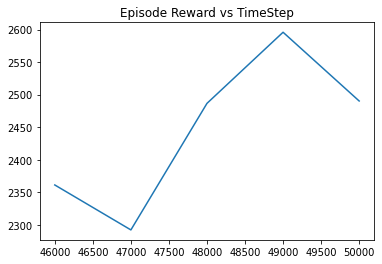

In [70]:
plt.plot([v[0] for v in reward_plot], [v[1] for v in reward_plot])
plt.title("Episode Reward vs TimeStep")
plt.show()

In [45]:
matplotlib.use('Agg')
# env = wrap_env(env)

baseEp(env)
baseEp(env)
baseEp(env)

env.close()
# show_video()

# print("End runtime: {} seconds".format(time.time()-start_time))

Random: Reward at Termination: -652.8554101276853
Random: Reward at Termination: -712.6995353010171
Random: Reward at Termination: -584.7761032867407


In [ ]:
class DQN_Network(nn.Module):
    def __init__(self): 
        super(DQN_Network, self).__init__() 
        
        # __GRU__ 
        """
        self.input_layer = nn.Linear(8, 128)
        self.hidden_1 = nn.Linear(128, 128)
        self.hidden_2 = nn.Linear(32,31)
        self.hidden_state = torch.tensor(torch.zeros(2,1,32))
        self.rnn = nn.GRU(128, 32, 2)
        self.action_head = nn.Linear(31, 5)
        """
        
        self.input_layer = nn.Linear(8, 32)
        self.hidden_1 = nn.Linear(32, 32)
        self.hidden_2 = nn.Linear(32,31)
        self.output_layer = nn.Linear(31, 5)
    

    def forward(self, state):
        state = state.squeeze()

        """
        out = torch.sigmoid(self.input_layer(state))
        out = torch.tanh(self.hidden_1(out))
        out, self.hidden_state = self.rnn(out.view(1,-1,128), self.hidden_state.data)
        out = F.relu(self.hidden_2(out.squeeze()))
        out = self.action_head(out)
        """
        out = F.relu(self.input_layer(state))
        out = F.relu(self.hidden_1(out))
        out = F.relu(self.hidden_2(out))
        out = F.sigmoid(self.output_layer(out))

        """
        out = F.relu(self.input_layer(state))
        out = F.relu(self.hidden_1(out))
        out = F.relu(self.hidden_2(out))
        out = F.relu(self.output_layer(out))
        """
        return out 

class DQN_Agent(): 
    def __init__(self): 
        #initialize target and policy networks 
        self.target_net = DQN_Network()
        self.policy_net = DQN_Network()

        self.eps_start = .9  
        self.eps_end = .05
        self.eps_decay = 200  
        self.steps_done = 0 

    def select_action(self, state): 
        random_n = random.random() #generate random number
        eps_threshold = self.eps_end + (self.eps_start - self.eps_end) * \
            math.exp(-1. * self.steps_done / self.eps_decay)
        self.steps_done += 1  

        if (random_n < eps_threshold): 
        #take random action (random # betwee 0 and 4)
            action = torch.tensor([random.randrange(4)]) 
        else: 
        #take the best action  
            with torch.no_grad(): 
                actions = self.policy_net(state)  
                action = torch.argmax(actions).view(1, 1) 
                
        return action.item() 
